# Week 2 Assignment

## Part 1  



### Loading the csv file

In [139]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

#since there is no header in csv file, we use header=None
df=pd.read_csv('houses.csv', header=None)

#adding header file to the DataFrame
df.columns=['Trans unique ID','Price','Date of Transfer','Postcode','Property type','Old/New','Duration','PAON','SAON', 'Street','Locality','Town/City','District','Country','PPD Category Type','Record Status']
df.head()

,Trans unique ID,Price,Date of Transfer,Postcode,Property type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,Country,PPD Category Type,Record Status
0,{02A6460F-C1F3-4977-B7ED-2A77C79302AE},52000,2001-12-07 00:00,DE6 1BL,S,N,F,1A,NaN,OLD HILL,ASHBOURNE,ASHBOURNE,DERBYSHIRE DALES,DERBYSHIRE,A,A
1,{5EEB0C41-09F5-4BDF-A73E-A4E72E20BFC4},57000,2003-09-12 00:00,B36 0RA,T,N,F,44,NaN,GREENFINCH ROAD,BIRMINGHAM,BIRMINGHAM,SOLIHULL,WEST MIDLANDS,A,A
2,{09975216-3588-418C-B6C5-A5704B0E77DE},69500,2005-12-21 00:00,OL16 2XR,T,N,L,143,NaN,BELFIELD ROAD,ROCHDALE,ROCHDALE,ROCHDALE,GREATER MANCHESTER,A,A
3,{44CB83B9-0EC3-48D4-9B8D-B34D13D3C09E},84000,2001-01-31 00:00,SN1 4LJ,T,N,F,34,NaN,KINGSHILL ROAD,SWINDON,SWINDON,SWINDON,SWINDON,A,A
4,{74828706-CBFC-406D-B7B6-394B5863E22E},110000,1998-02-27 00:00,OX3 8AJ,S,N,F,62,NaN,WHARTON ROAD,HEADINGTON,OXFORD,OXFORD,OXFORDSHIRE,A,A


### Finding the mean, median, standard deviation, minimum and maximum of the dataset

In [140]:
# Calculating mean, median, StdDe, min and max of the given dataset
df2=pd.DataFrame([df['Price'].mean(),df['Price'].median(),df['Price'].std(),df['Price'].min(),df['Price'].max()],\
                 ['mean','median','standard dev','minimun','maximum'], columns=[' '])
StdDev=df['Price'].std()
Median=df['Price'].median()
df2.head(10)

,
mean,1.743868e+05
median,1.290000e+05
standard dev,3.514634e+05
minimun,1.500000e+02
maximum,4.846572e+07


### Plotting the data

On plotting the data as a histogram, there are outliers such as the maximum = 4.846572e+07, which is very large compared to the mean and median. This changes the scale of the x-axis, thus we get a very skewed distribution. We can reduced the skewness of the histogram by not including outliers from the dataset.  
Outliers are values which are more than 1.5x StdDev from the median on either side.

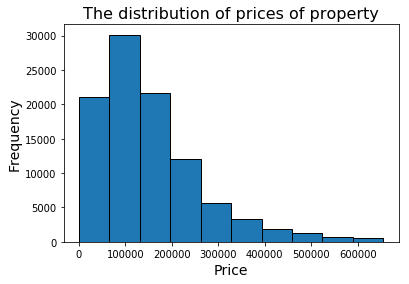

In [141]:
# The distribution of prices of property
%matplotlib inline
x=df[df['Price']<=Median + 1.5*StdDev]
x=x['Price']
# Max=df['Price'].max()
plt.hist(x, edgecolor='k')
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('The distribution of prices of property', fontsize=16)
plt.show()

### Comparing the prices of property inside and outside London

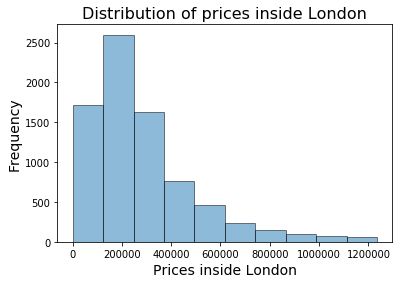

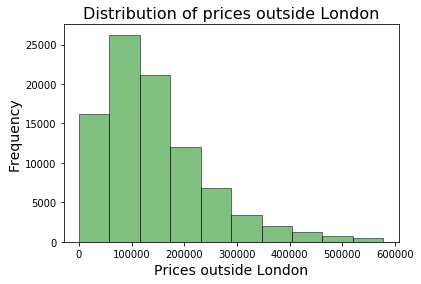

In [142]:
# Prices of houses inside and outside London

x=df[(df['Town/City']=='LONDON')]
Median=x['Price'].median()
StdDev=x['Price'].std()
x=x[x['Price'] <=Median + 1.5*StdDev]
y=df[(df['Town/City']!='LONDON')]
Median=y['Price'].median()
StdDev=y['Price'].std()
y=y[y['Price'] <=Median + 1.5*StdDev]
x=x['Price']
y=y['Price']
plt.hist(x, edgecolor='k', alpha=0.5, label='Inside London')
plt.xlabel('Prices inside London', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of prices inside London', fontsize=16)
plt.show()
plt.hist(y, edgecolor='k', alpha=0.5, facecolor='green', label='Outside London')
plt.xlabel('Prices outside London', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of prices outside London', fontsize=16)
plt.show()

From the above plots, we can see that property is costlier inside London.  

### Plotting the average prices per year of the properties

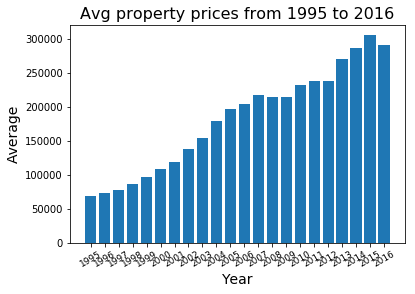

In [143]:
# Plotting average prices per year
import datetime
df['Date of Transfer']=pd.to_datetime(df['Date of Transfer'])
df2=pd.DataFrame(data = {'Year':[], 'Mean':[]})
# df2.columns=['Year','Mean']
for yr in range(1995,2017):
    x=df[pd.DatetimeIndex(df['Date of Transfer']).year==yr]
    Mean=x['Price'].mean()
    df2=df2.append({'Year':yr, 'Mean':Mean}, ignore_index=True)
plt.bar(df2['Year'],df2['Mean'])
# fig=plt.figure(figsize=(15, 10))
plt.rcParams['figure.figsize'] = [9, 5]
plt.xlabel('Year', fontsize=14)
plt.xticks(df2['Year'] ,list(range(1995,2017)) , fontsize=9, rotation=30)
plt.ylabel('Average',fontsize=14)
plt.title('Avg property prices from 1995 to 2016', fontsize=16)
plt.show()

## Part 2

### Creating a list of randomly generated numbers using random.rand()

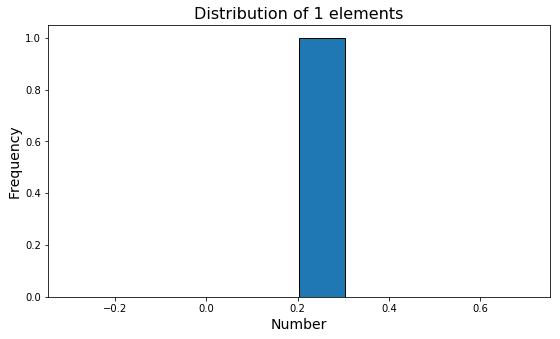

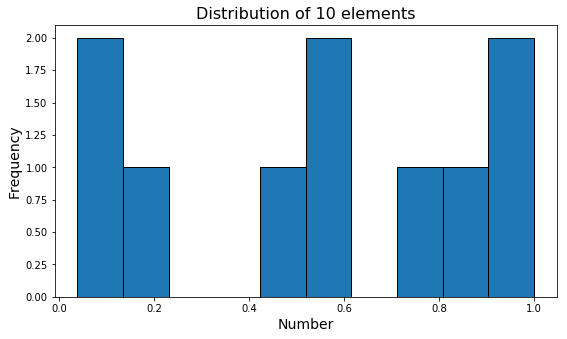

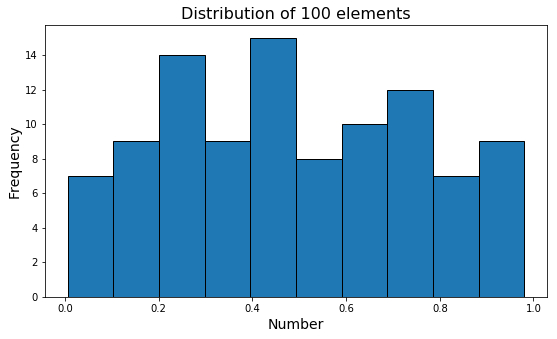

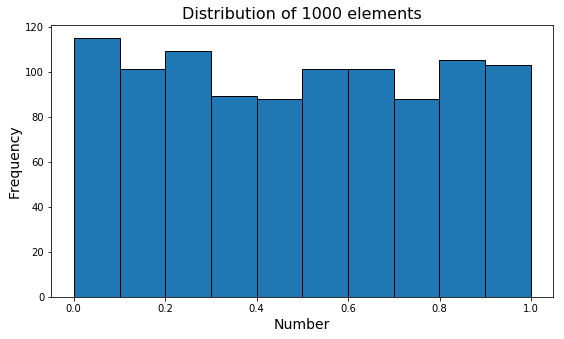

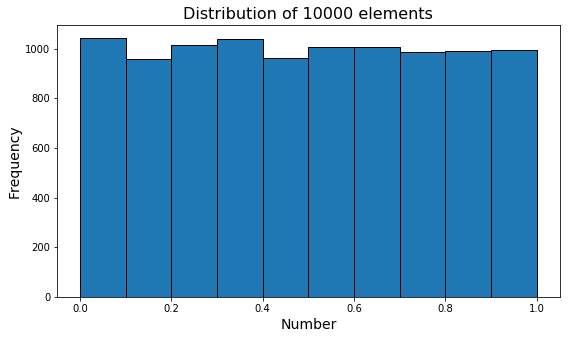

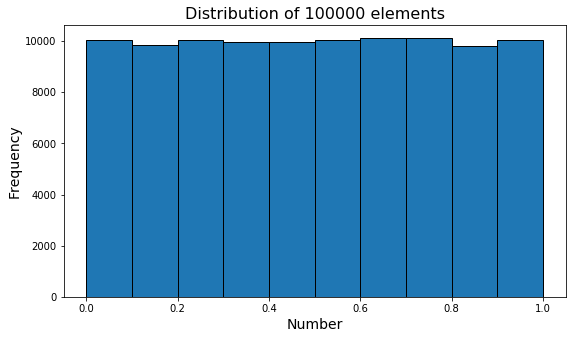

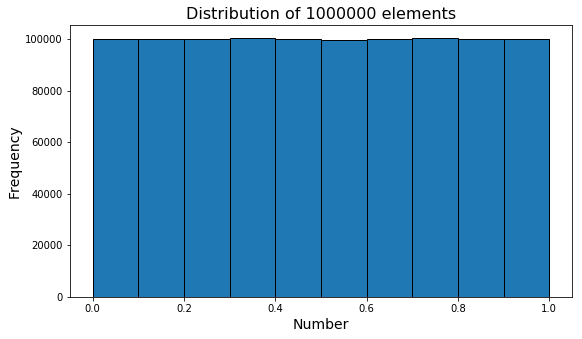

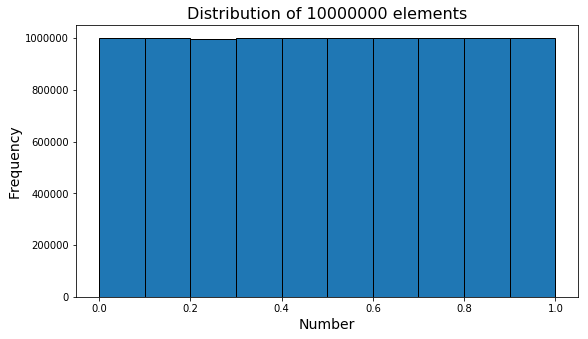

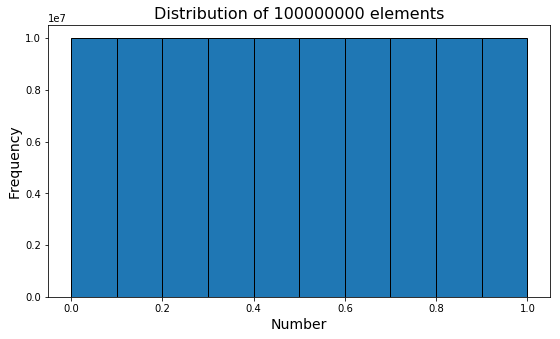

In [144]:
import numpy.random as rd
for i in range(0,9):
    n=10**i
    Range=rd.rand(n)
    plt.hist(Range, edgecolor='k')
    plt.xlabel('Number', fontsize=14)
    plt.ylabel('Frequency',fontsize=14)
    plt.title('Distribution of '+str(10**i)+' elements', fontsize=16)
    plt.show()
# n=10
# Range=rd.rand(n)
# Range

We see that on increasing n ie. no of elements in the list, the distribution becomes uniform. This is because random.rand chooses numbers from a uniform distribution.  

### Generating random nubers based on Gaussian/Normal distribution

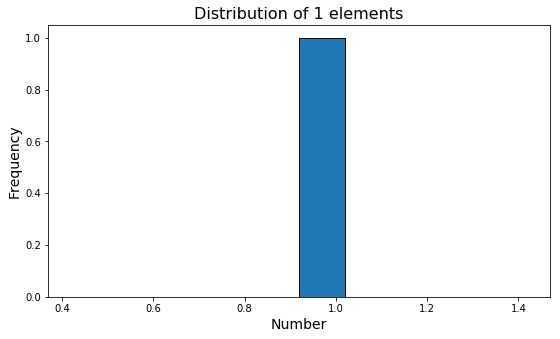

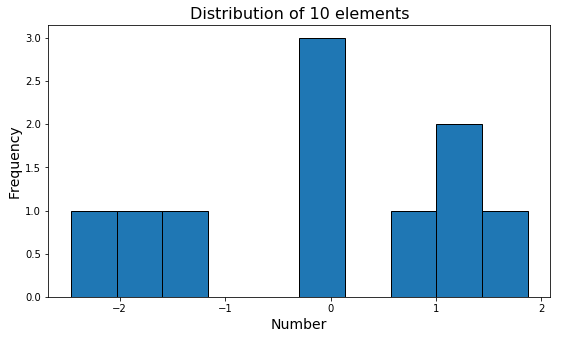

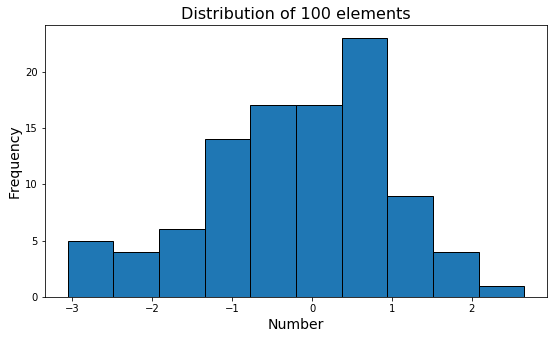

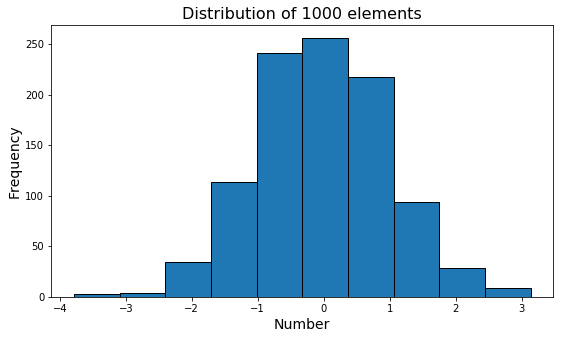

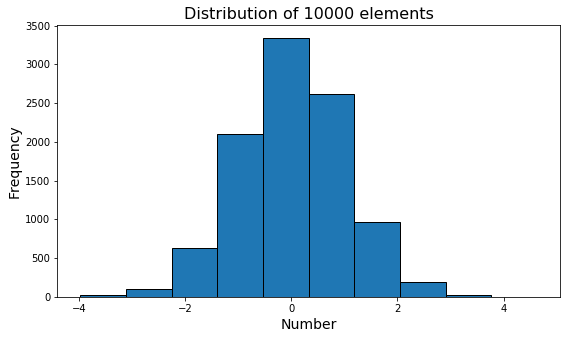

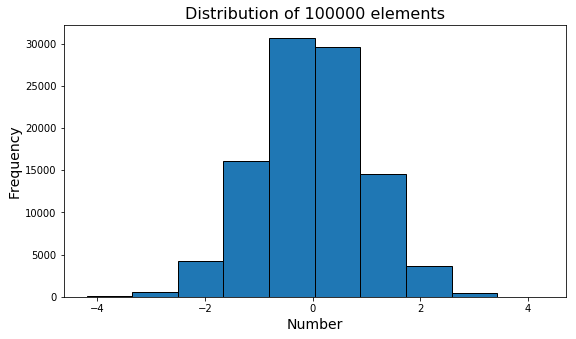

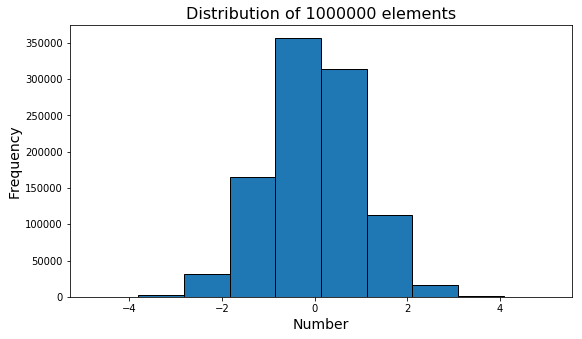

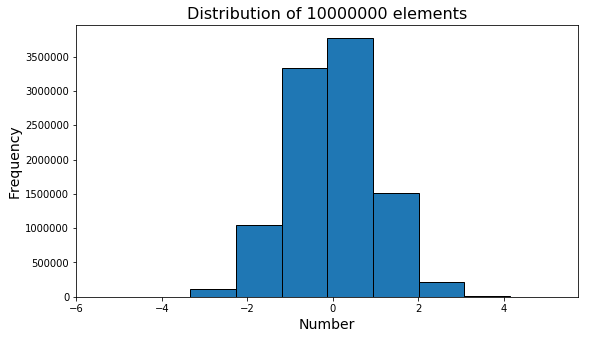

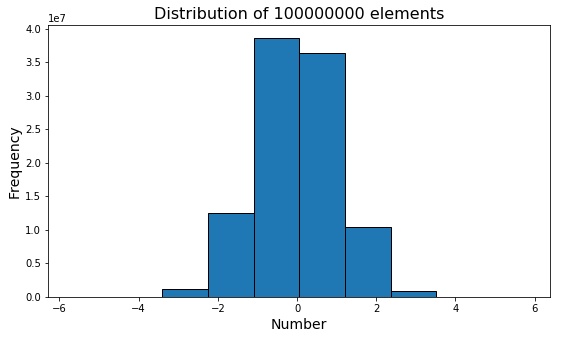

In [145]:
#generating random nubers based on Gaussian/Normal distribution
for i in range(0,9):
    n=10**i
    Range=rd.randn(n)
    plt.hist(Range, edgecolor='k')
    plt.xlabel('Number', fontsize=14)
    plt.ylabel('Frequency',fontsize=14)
    plt.title('Distribution of '+str(10**i)+' elements', fontsize=16)
    plt.show()

### Generating random nubers based on binomial distribution

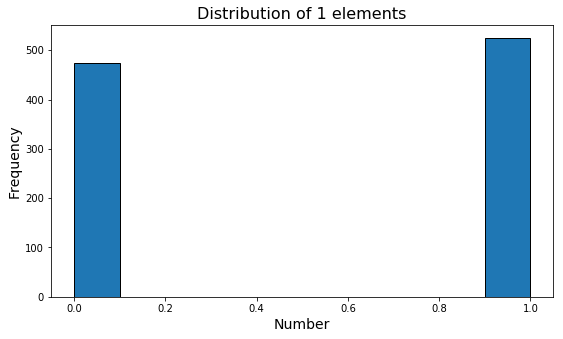

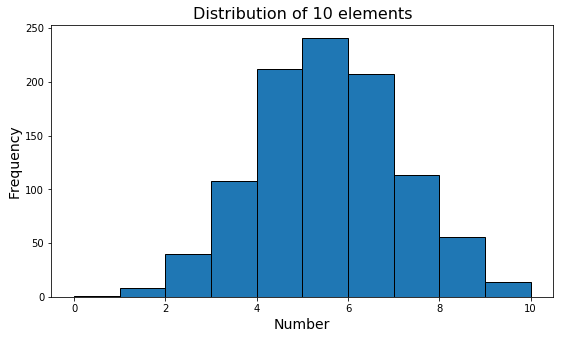

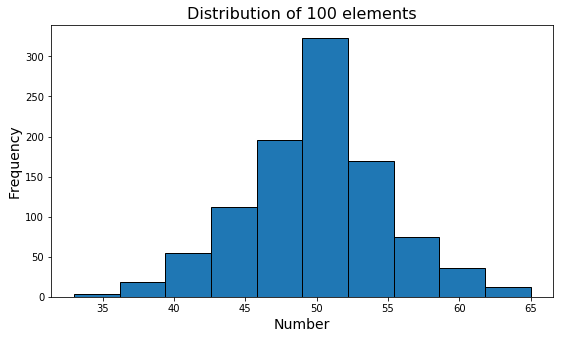

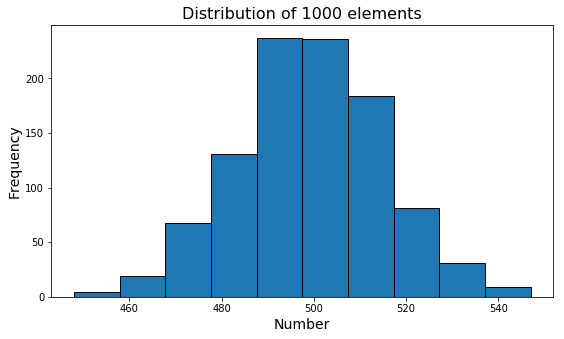

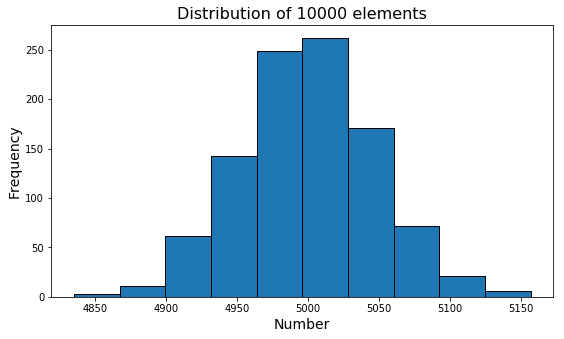

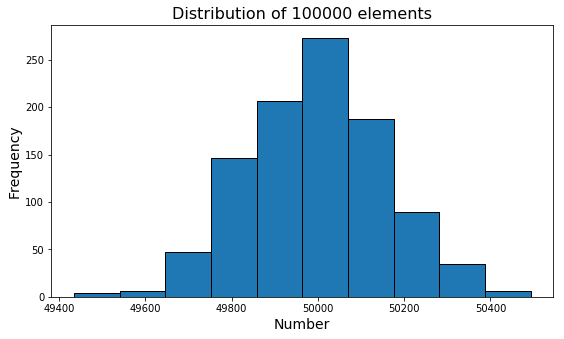

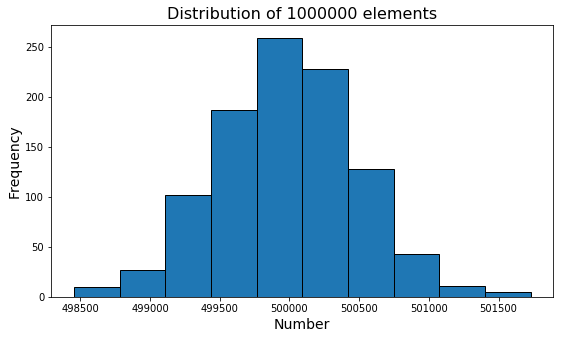

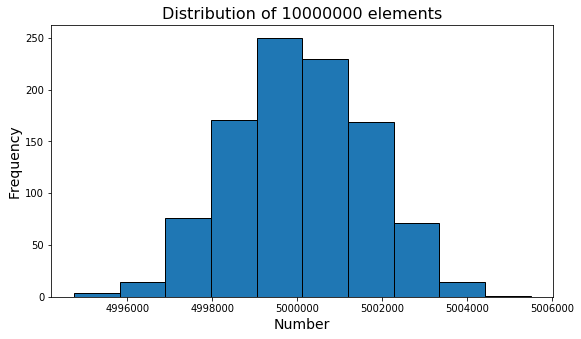

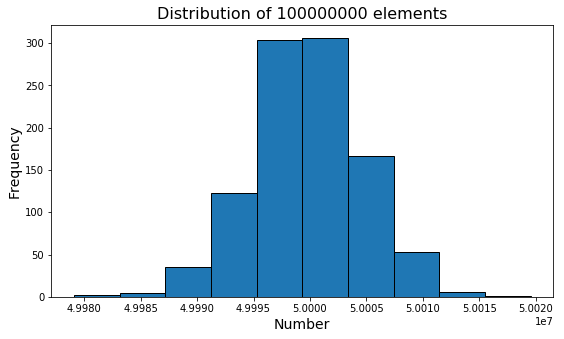

In [146]:
#generating random nubers based on binomial distribution
for i in range(0,9):
    n=10**i
    Range=rd.binomial(n,0.5,1000)
    plt.hist(Range, edgecolor='k')
    plt.xlabel('Number', fontsize=14)
    plt.ylabel('Frequency',fontsize=14)
    plt.title('Distribution of '+str(10**i)+' elements', fontsize=16)
    plt.show()

### Generating random nubers based on Poisson distribution

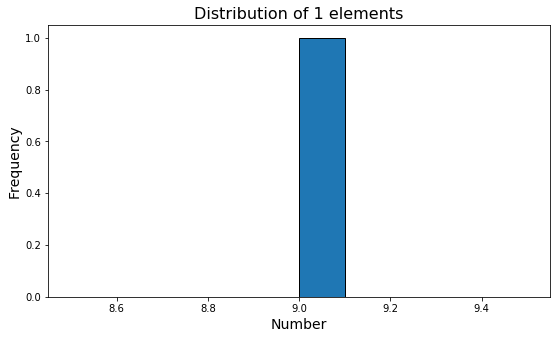

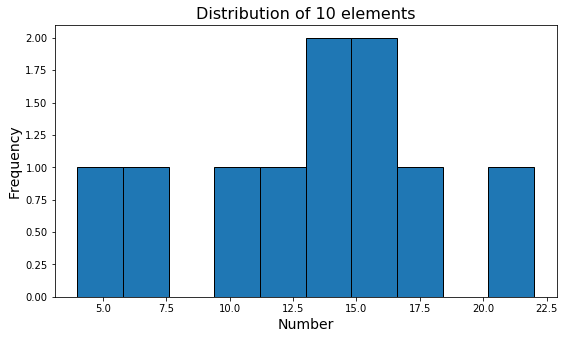

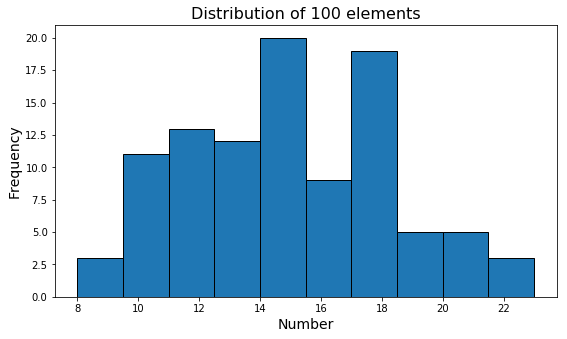

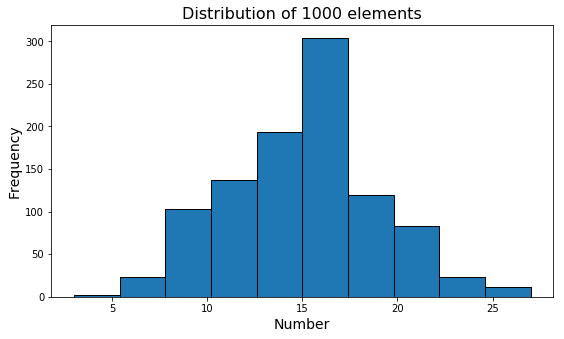

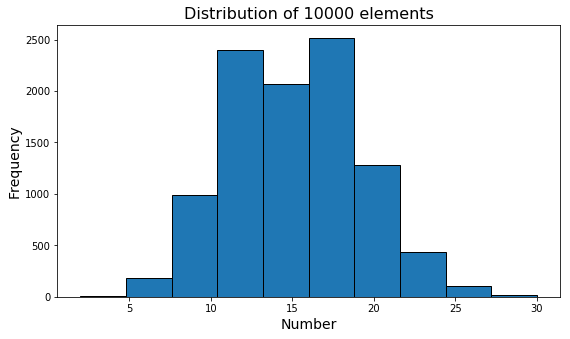

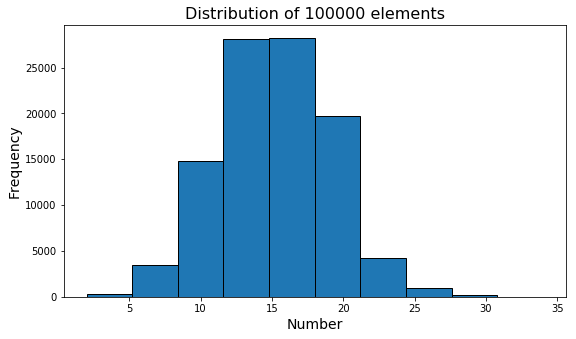

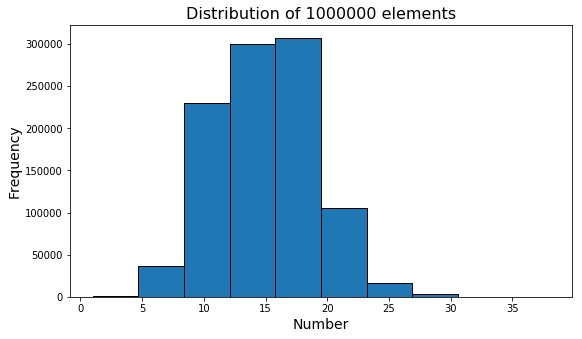

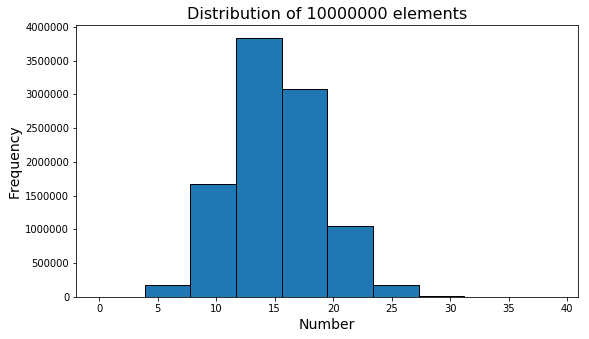

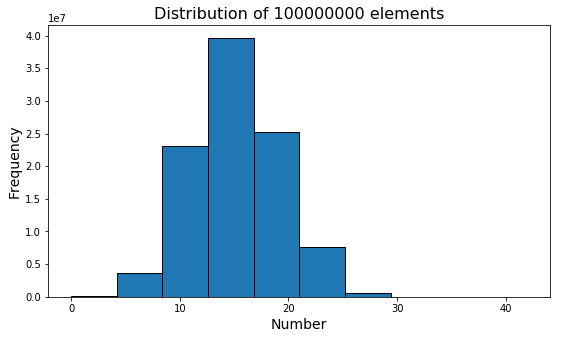

In [147]:
#generating random nubers based on Poisson distribution
for i in range(0,9):
    n=10**i
    Range=rd.poisson(15,n)
    plt.hist(Range, edgecolor='k')
    plt.xlabel('Number', fontsize=14)
    plt.ylabel('Frequency',fontsize=14)
    plt.title('Distribution of '+str(10**i)+' elements', fontsize=16)
    plt.show()